In [25]:
import csv
import numpy as np
import matplotlib.pyplot as p
import math
import os
from os import walk
import scipy.io as sio
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

#folder = r'C:\Users\zomege\Documents\Machine Learning\Matlab\Training_Data_(Line_06)\\'
folder = r'C:\Users\admin\Desktop\Machine Learning\NewCSV\CSV1\Line_05_(RMS_and_SEL)\\'
#saveLoc = r'C:\Users\zomege\Documents\Machine Learning\data.mat'
saveLoc = r'C:\Users\admin\Desktop\Machine Learning\data.mat'

In [17]:
#Header of csv1
#Date[0],Time[1],Depth of Airgun(m)[2],Depth of Reciever(m)[3],X Airgun[4],Y Airgun[5],Z Airgun[6],X_R1[7],Y_R1[8],Z_R1[9],SEL[10],RMS[11],T90[12]
#Python array
#Range(m)[0],T90[1]

#Conditional creation of a matlab data structure
if(not(os.path.isfile(saveLoc))):
    files = os.listdir(folder)
    length = len(files)
    data = np.zeros([length,636,2])
    f = 0#file index
    for filename in files:
        e = 0#hydrophone index
        dirname = folder+filename
        print(dirname)
        if filename.endswith(".csv"): 
            with open(dirname) as csvFile:
                csvReader = csv.reader(csvFile)
                next(csvReader,None)#Skip header
                for row in csvReader:
                    range1 = math.sqrt((float(row[7]))**2+(float(row[8]))**2)#range = dist([X_R1,Y_R1],[X_Airgun,Y_airgun])
                    data[f,e] = [range1,row[12]]#range, T90
                    e = e + 1
        f = f + 1 
    sio.savemat(saveLoc, mdict={'data': data})
else:
    save = sio.loadmat(saveLoc)
    data = save['data']

(2650, 636, 2)


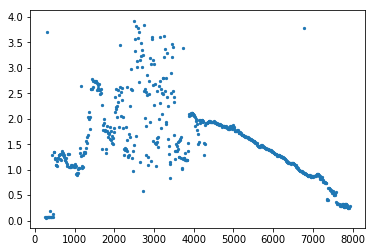

In [21]:
#Begining of line plot
print(np.shape(data))
xs = data[1,:,0]#range
ys = data[1,:,1]#T90
p.scatter(xs,ys,s=5)
p.show()

(2650, 636, 2)


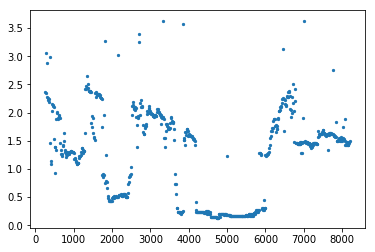

In [23]:
#Middle of line plot (1800th file)
xs = data[1800,:,0]#range
ys = data[1800,:,1]#T90
p.scatter(xs,ys,s=5)
p.show()

(2650, 636, 2)


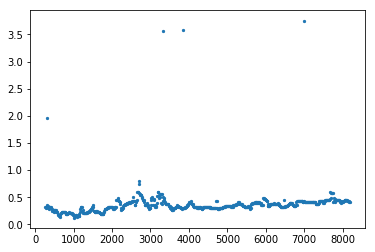

In [24]:
#end of line plot (2500th)
xs = data[2500,:,0]#range
ys = data[2500,:,1]#T90
p.scatter(xs,ys,s=5)
p.show()

In [ ]:
#slider plot
xs = data[2500,:,0]#range
ys = data[2500,:,1]#T90
p.scatter(xs,ys,s=5)
p.show()

interact(f, x=widgets.IntSlider(min=0,max=30,step=1,value=10));